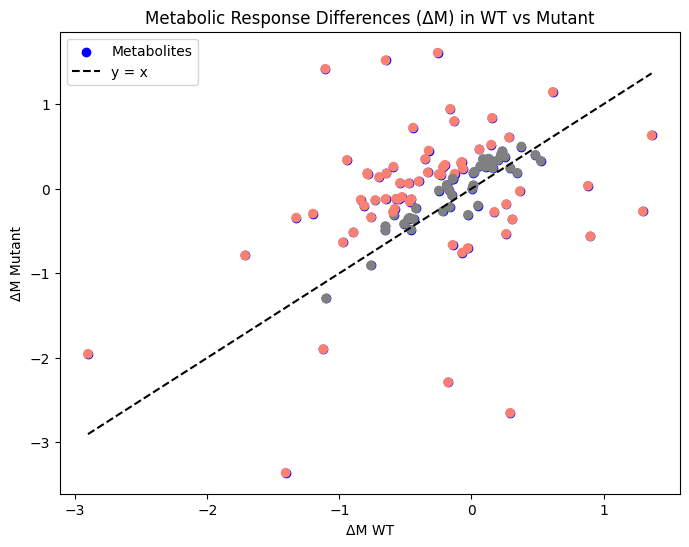

Metabolites outside cutoff range: ['acetylcarnitine', 'adenine', 'adenosine_cyclic_monophosphate', 'adenosine_monophosphate', 'adipic_acid', 'alpha_ketoglutaric_acid', 'aminoadipic_acid', 'arabitol', 'arginine', 'argininosuccinic_acid', 'asparagine', 'aspartic_acid', 'butyrylcarnitine', 'carnitine', 'citramalic_acid', 'citrulline', 'creatine', 'creatine_phosphate', 'creatinine', 'cystathionine', 'cystine', 'deoxyadenosine_triphosphate', 'deoxythymidine_triphosphate', 'deoxyuridine', 'dihydroxyisovalerate', 'gamma_glu_cys', 'glutamine', 'glycine', 'guanosine', 'hexose', 'hexose_6_phosphate', 'histidine', 'hydroxy_glutamic_acid', 'hydroxyglutaric_acid', 'hypoxanthine', 'isoleucine', 'itaconic_acid', 'lactic_acid', 'leucine', 'maleic_acid', 'methionine', 'myristoylcarnitine', 'n_acetylglutamic_acid', 'n_carbamyl_glutamic_acid', 'o_phosphorylethanolamine', 'orotic_acid', 'oxamic_acid', 'phenylalanine', 'phospho_serine', 'pyridoxal_hydrochloride', 'pyruvic_acid', 'riboflavin', 'ribose_5_pho

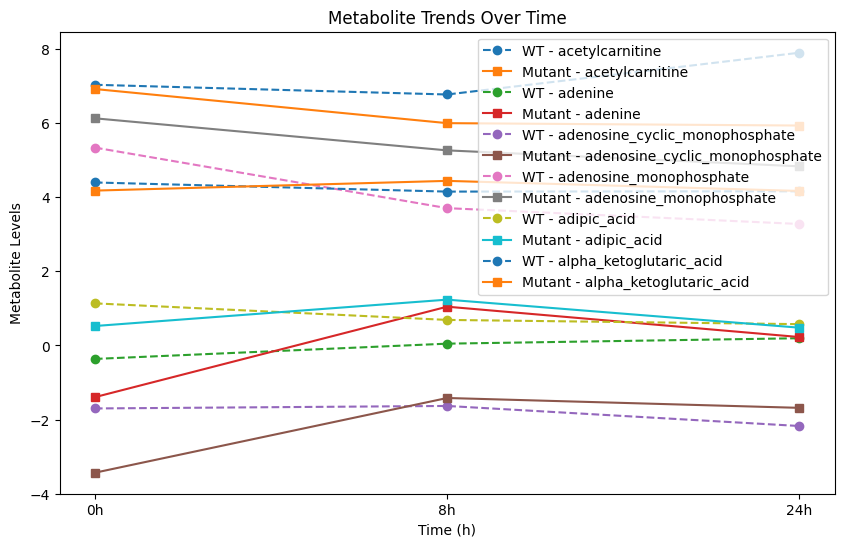

'The comparison between WT and mutant plant metabolic responses (ΔM) typically aligns with the y = x correlation yet certain metabolites show substantial deviations which suggest mutants have changed metabolic reactions. The metabolic response levels of Acetylcarnitine, Adenine, Adenosine derivatives (AMP, cAMP), Adipic acid, and Alpha-ketoglutaric acid showed unexpected variations in intensity. Analysis of temporal data demonstrates that Acetylcarnitine and Adenine decline steadily in wild-type organisms yet display unpredictable patterns in mutants while Adenosine derivatives remain unstable, and Alpha-ketoglutaric acid builds up in mutant organisms pointing to altered energy metabolism. Metabolites that plot above the y = x line indicate either decreased breakdown efficiency or alternative accumulation routes while metabolites below this line demonstrate effective breakdown or impaired signaling processes. Mutant plants show major rewiring in energy and signaling pathways through me

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
url = "https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/Pesticide_treatment_data.txt"
df = pd.read_csv(url, sep="\t")

# Display the first few rows
df.head()

# Set first column ('Unnamed: 0') as index (this contains sample names)
df.set_index("Unnamed: 0", inplace=True)

# Identify sample groups
wt_dmso = df.loc[df.index.str.contains("WT_DMSO")].mean()
wt_24h = df.loc[df.index.str.contains("WT_pesticide_24h")].mean()

mutant_dmso = df.loc[df.index.str.contains("mutant_DMSO")].mean()
mutant_24h = df.loc[df.index.str.contains("mutant_pesticide_24h")].mean()

# Step 1: Compute ΔM
df_diff = pd.DataFrame({
    "ΔM_WT": wt_24h - wt_dmso,
    "ΔM_Mutant": mutant_24h - mutant_dmso
})

# Step 2: Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(df_diff["ΔM_WT"], df_diff["ΔM_Mutant"], color="blue", label="Metabolites")

# Step 3: Fit a y=x line
x = np.linspace(df_diff["ΔM_WT"].min(), df_diff["ΔM_WT"].max(), 100)
plt.plot(x, x, color="black", linestyle="--", label="y = x")

# Step 4: Compute Residuals
df_diff["Residuals"] = df_diff["ΔM_Mutant"] - df_diff["ΔM_WT"]

# Step 5: Color Code Metabolites
residual_cutoff = 0.3
colors = df_diff["Residuals"].apply(lambda r: "salmon" if abs(r) > residual_cutoff else "grey")

plt.scatter(df_diff["ΔM_WT"], df_diff["ΔM_Mutant"], color=colors)
plt.xlabel("ΔM WT")
plt.ylabel("ΔM Mutant")
plt.legend()
plt.title("Metabolic Response Differences (ΔM) in WT vs Mutant")
plt.show()

# Step 6: Identify Outlier Metabolites
outlier_metabolites = df_diff[abs(df_diff["Residuals"]) > residual_cutoff].index.tolist()
print("Metabolites outside cutoff range:", outlier_metabolites)

# Step 7: Plot Trends for 6 Selected Metabolites
selected_metabolites = outlier_metabolites[:6]
time_points = ["0h", "8h", "24h"]

plt.figure(figsize=(10, 6))
for met in selected_metabolites:
    wt_values = [
        df.loc[df.index.str.contains("WT_pesticide_0"), met].mean(),
        df.loc[df.index.str.contains("WT_pesticide_8h"), met].mean(),
        df.loc[df.index.str.contains("WT_pesticide_24h"), met].mean()
    ]
    mutant_values = [
        df.loc[df.index.str.contains("mutant_pesticide_0"), met].mean(),
        df.loc[df.index.str.contains("mutant_pesticide_8h"), met].mean(),
        df.loc[df.index.str.contains("mutant_pesticide_24h"), met].mean()
    ]
    plt.plot(time_points, wt_values, marker="o", linestyle="--", label=f"WT - {met}")
    plt.plot(time_points, mutant_values, marker="s", linestyle="-", label=f"Mutant - {met}")

plt.xlabel("Time (h)")
plt.ylabel("Metabolite Levels")
plt.title("Metabolite Trends Over Time")
plt.legend()
plt.show()

"""The comparison between WT and mutant plant metabolic responses (ΔM) typically aligns with the y = x correlation yet certain metabolites show substantial deviations which suggest mutants have changed metabolic reactions. The metabolic response levels of Acetylcarnitine, Adenine, Adenosine derivatives (AMP, cAMP), Adipic acid, and Alpha-ketoglutaric acid showed unexpected variations in intensity. Analysis of temporal data demonstrates that Acetylcarnitine and Adenine decline steadily in wild-type organisms yet display unpredictable patterns in mutants while Adenosine derivatives remain unstable, and Alpha-ketoglutaric acid builds up in mutant organisms pointing to altered energy metabolism. Metabolites that plot above the y = x line indicate either decreased breakdown efficiency or alternative accumulation routes while metabolites below this line demonstrate effective breakdown or impaired signaling processes. Mutant plants show major rewiring in energy and signaling pathways through metabolic shifts that could guide the development of better mutation strategies for pesticide resistance."""